## <center>CMSC6950 | Fall 2023<center>
## <center>Project: St. John's Climate Data Analysis<center>
## <center>Mohammadali Mirmojarabian, 202292543<center>
___

We want to analyze St. John's climate data. To access data source and for a comprehensive information about the data please refer to https://stjohns.weatherstats.ca/download.html.
<!-- For Frequently Asked Questions visit [here](https://www.weatherstats.ca/faq/#copying). -->

We downloaded 200 daily climatic data points. I might want to increase data points to 400 if needed. In this specific project, we don't need to examine all measurements. We choose temperature and wind speed features; we might use other features from original dataset if needed, which then would be described in that case.
- `max_temperature` and `min_temperature`: Maximum and Minimum Temperature (**°C**)

- `avg_temperature` is the average between the daily maximum and minimum temperatures, while `avg_hourly_temperature` is the average of all the hourly temperatures within the day.

- `max_wind_speed` and `min_wind_speed`: Maximum and Minimum Wind Speed (**km/h**)

- `precipitation`: Precipitation (**mm**): The amount of rain/snow/etc. received. Snow is melted to create a water equivalent. 1cm snow is approx. 1mm of precipitation, but the exact amount depends on the snow density (e.g., corn snow vs light fluffy snow). 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.dates import MonthLocator, DateFormatter

In [2]:
cols = ['date','max_temperature','min_temperature','avg_hourly_temperature','avg_temperature','max_wind_speed',
'avg_hourly_wind_speed','min_wind_speed','precipitation']

df = pd.read_csv('../data/data.csv', parse_dates=['date'], index_col=['date'], usecols=cols)
df

,max_temperature,avg_hourly_temperature,avg_temperature,min_temperature,max_wind_speed,avg_hourly_wind_speed,min_wind_speed,precipitation
date,,,,,,,,
2023-10-16,11.8,9.98,9.80,7.8,43,27.50,7,51.2
2023-10-15,16.0,11.51,12.30,8.6,25,16.12,9,0.4
2023-10-14,13.2,11.64,11.80,10.4,36,25.50,16,6.2
2023-10-13,12.3,10.90,11.20,10.1,26,17.50,6,1.0
2023-10-12,13.8,11.40,11.35,8.9,19,8.54,1,0.6
...,...,...,...,...,...,...,...,...
2022-02-28,-1.1,-4.35,-5.55,-10.0,36,19.12,1,9.2
2022-02-27,-2.4,-6.70,-7.55,-12.7,38,23.33,11,0.0
2022-02-26,-7.8,-8.81,-9.60,-11.4,33,22.46,3,3.8


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 600 entries, 2023-10-16 to 2022-02-24
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   max_temperature         600 non-null    float64
 1   avg_hourly_temperature  600 non-null    float64
 2   avg_temperature         600 non-null    float64
 3   min_temperature         600 non-null    float64
 4   max_wind_speed          600 non-null    int64  
 5   avg_hourly_wind_speed   600 non-null    float64
 6   min_wind_speed          600 non-null    int64  
 7   precipitation           600 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 42.2 KB


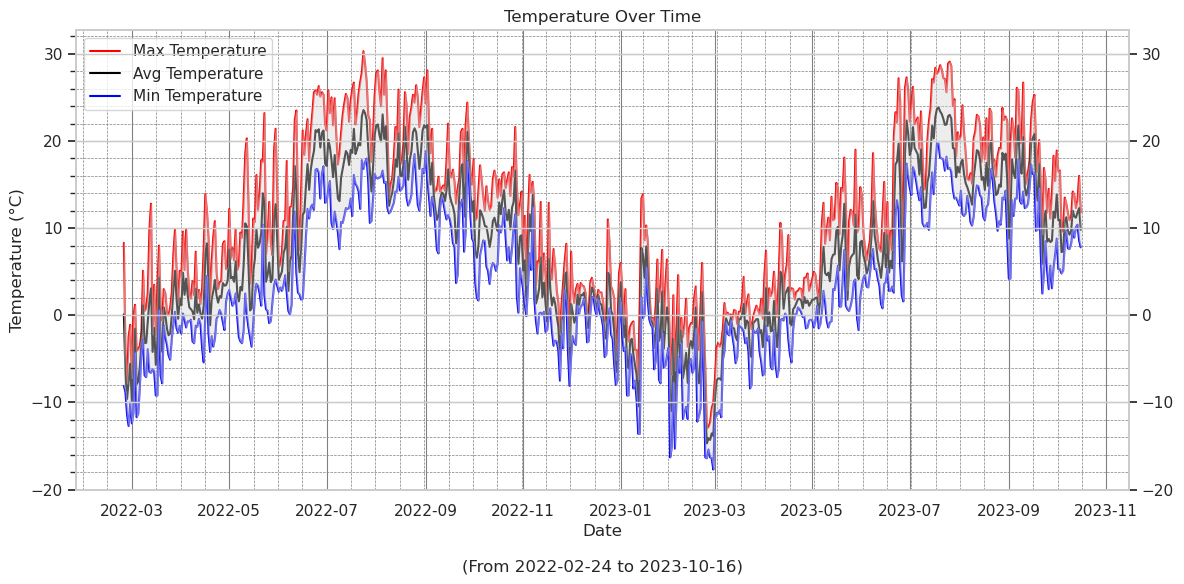

In [4]:
# Set the style for Seaborn
sns.set(style="whitegrid")

# Create a time series plot for temperature
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the temperature columns with Seaborn
sns.lineplot(data=df, x=df.index, y='max_temperature', ax=ax, label='Max Temperature', color='red')
sns.lineplot(data=df, x=df.index, y='avg_temperature', ax=ax, label='Avg Temperature', color='black')
sns.lineplot(data=df, x=df.index, y='min_temperature', ax=ax, label='Min Temperature', color='blue')

# Customize the plot
ax.set_xlabel('Date\n\n(From 2022-02-24 to 2023-10-16)')
ax.set_ylabel('Temperature (°C)')
ax.set_title('Temperature Over Time')

# Set grids
ax.minorticks_on()
plt.grid(True, which='major', linestyle='-', linewidth=0.8, color='gray')
plt.grid(True, which='minor', linestyle='--', linewidth=0.5, color='gray')

# Create a new axes for fill_between plot
ax_fill = ax.twinx()
# Plot fill_between
temp = df[['min_temperature', 'max_temperature', 'avg_temperature']]
ax_fill.fill_between(x=df.index, y1=temp['min_temperature'], y2=temp['max_temperature'], alpha=0.4, color='lightgray')

plt.tight_layout()
plt.savefig('../figures/First-plot-proposal.png', facecolor='w', dpi=1000)
plt.show()

## Doing Basic Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 600 entries, 2023-10-16 to 2022-02-24
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   max_temperature         600 non-null    float64
 1   avg_hourly_temperature  600 non-null    float64
 2   avg_temperature         600 non-null    float64
 3   min_temperature         600 non-null    float64
 4   max_wind_speed          600 non-null    int64  
 5   avg_hourly_wind_speed   600 non-null    float64
 6   min_wind_speed          600 non-null    int64  
 7   precipitation           600 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 42.2 KB


In [4]:
df.describe()

,max_temperature,avg_hourly_temperature,avg_temperature,min_temperature,max_wind_speed,avg_hourly_wind_speed,min_wind_speed,precipitation
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.00000,600.000000
mean,11.339500,7.316550,7.535367,3.733167,36.838333,23.847683,11.23500,3.875333
std,9.439852,8.470733,8.668497,8.240108,12.513320,8.945891,7.75586,8.323442
min,-13.000000,-15.070000,-14.700000,-17.700000,12.000000,7.290000,1.00000,0.000000
25%,3.000000,0.735000,0.897500,-1.825000,28.000000,17.120000,5.00000,0.000000
50%,11.450000,6.640000,6.900000,2.550000,36.000000,23.100000,9.00000,0.400000
75%,18.825000,14.672500,14.917500,11.400000,45.000000,29.342500,16.00000,4.025000
max,30.300000,24.330000,23.850000,19.700000,83.000000,60.610000,49.00000,80.600000


## Histograms

In [3]:
def plot_histograms_density(df, columns):
    fig, axs = plt.subplots(len(columns), 1, figsize=(20,50))
    i = 0
    for c in columns:
        df[c].hist(ax=axs[i], density=True, label="normalized histogram plot") # normalizes the density
        df[c].plot.density(ax=axs[i], label="probability density plot")
        axs[i].set(title=f"{c} probabilities VS. {c} values")
        axs[i].legend(loc="upper right")
        i+=1

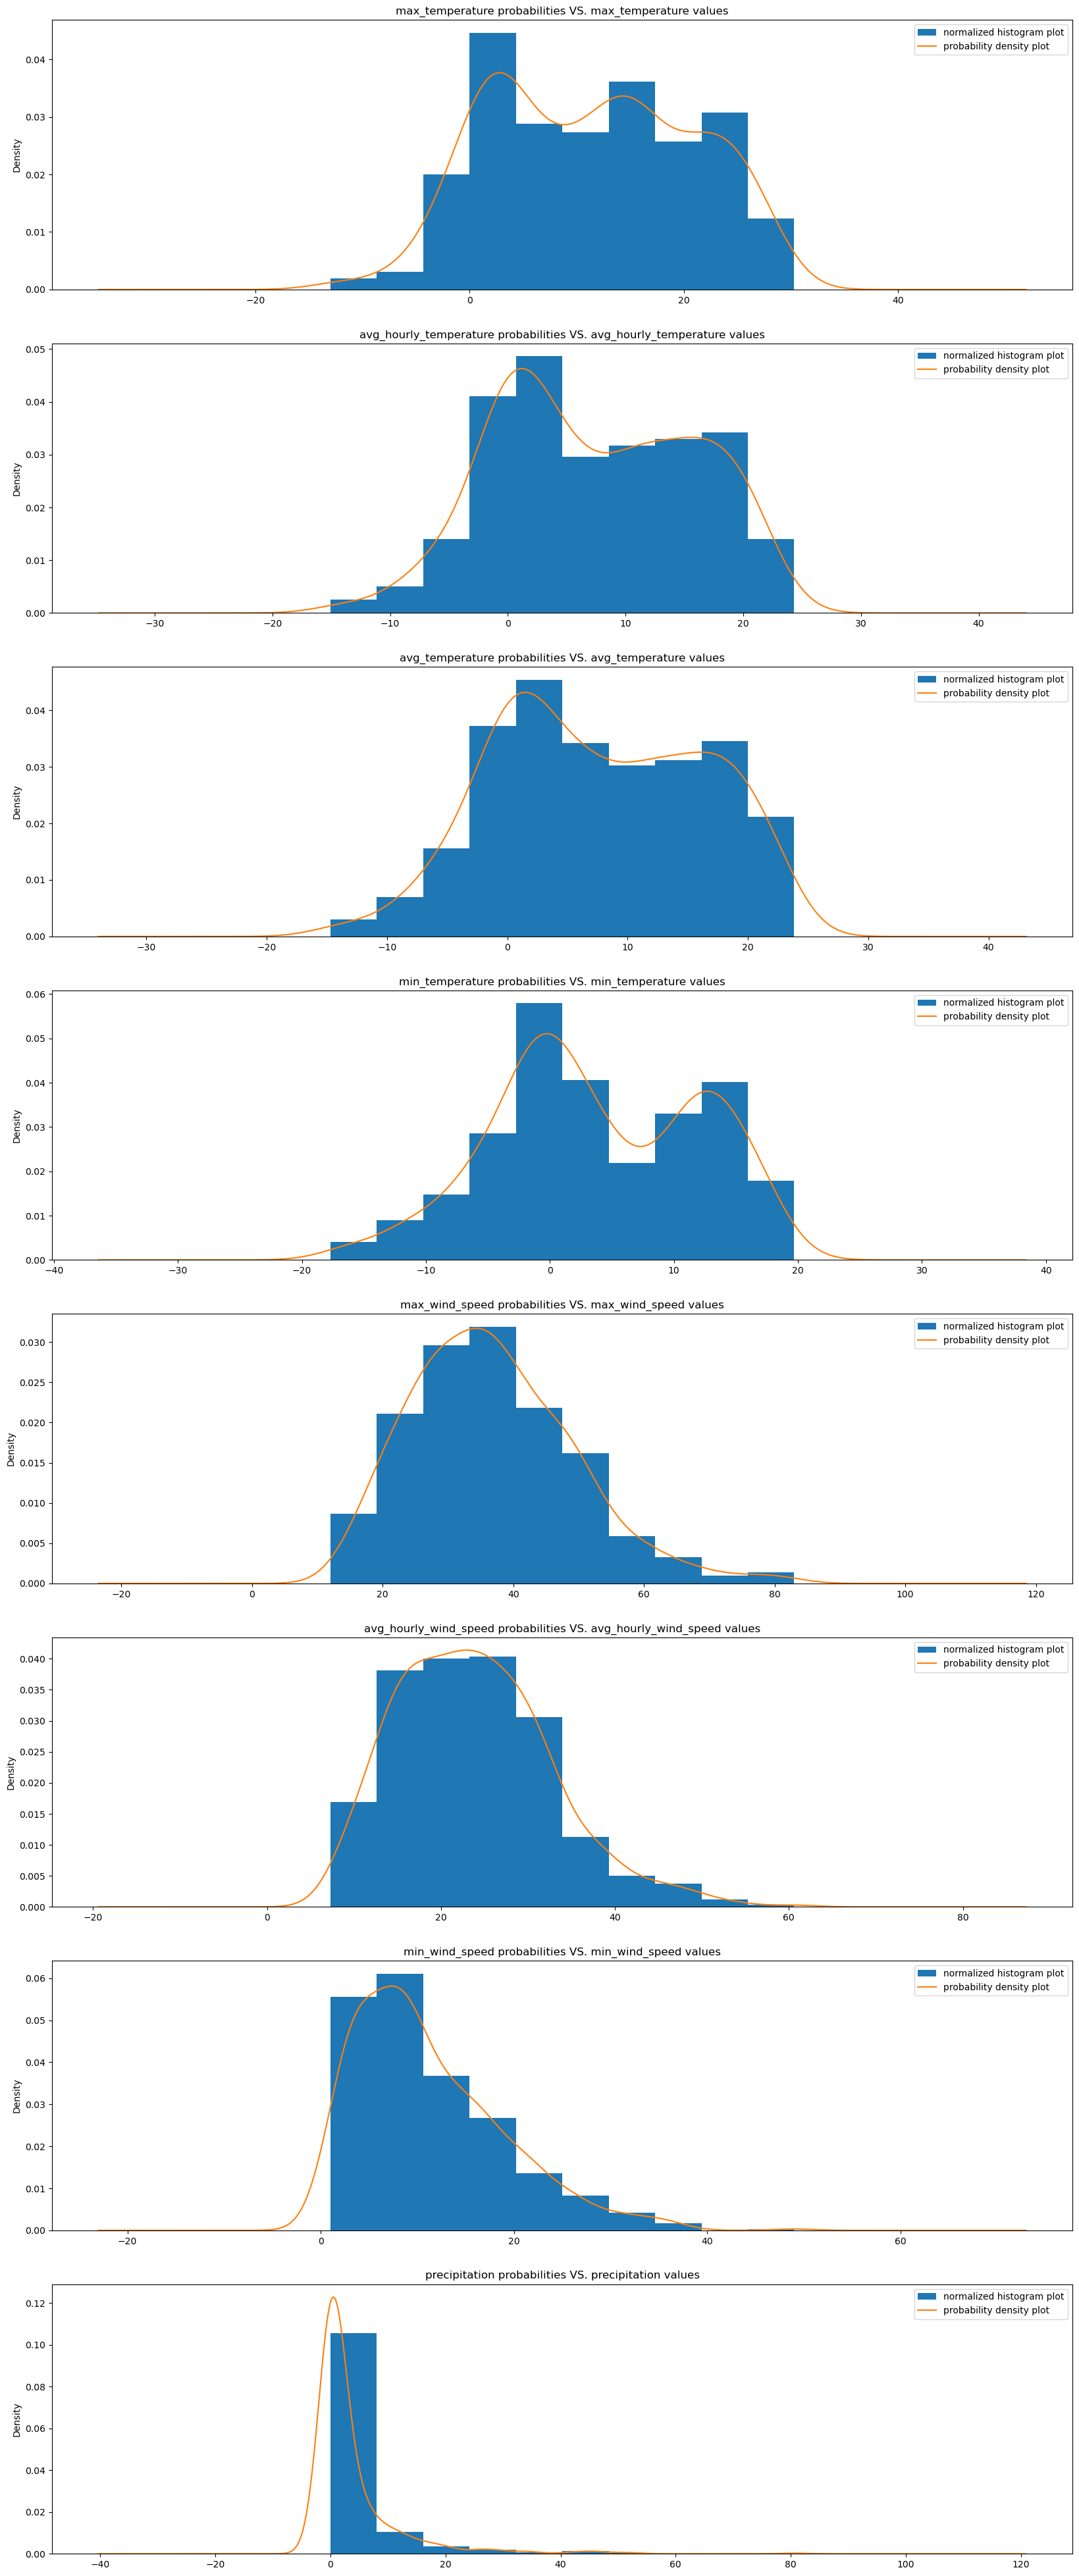

In [4]:
plot_histograms_density(df, df.columns)

## Boxplots

In [3]:
def boxplots(df, columns):
    fig, axs = plt.subplots(len(columns), 1, figsize=(20, 50))
    axs = axs.flatten()
    i=0
    for c in columns:
        df.boxplot(c, ax=axs[i], vert=False) #c = df.columns[i]: column name
        axs[i].set_title(f'Boxplot of the "{c}" data')
        i+=1
    plt.show()

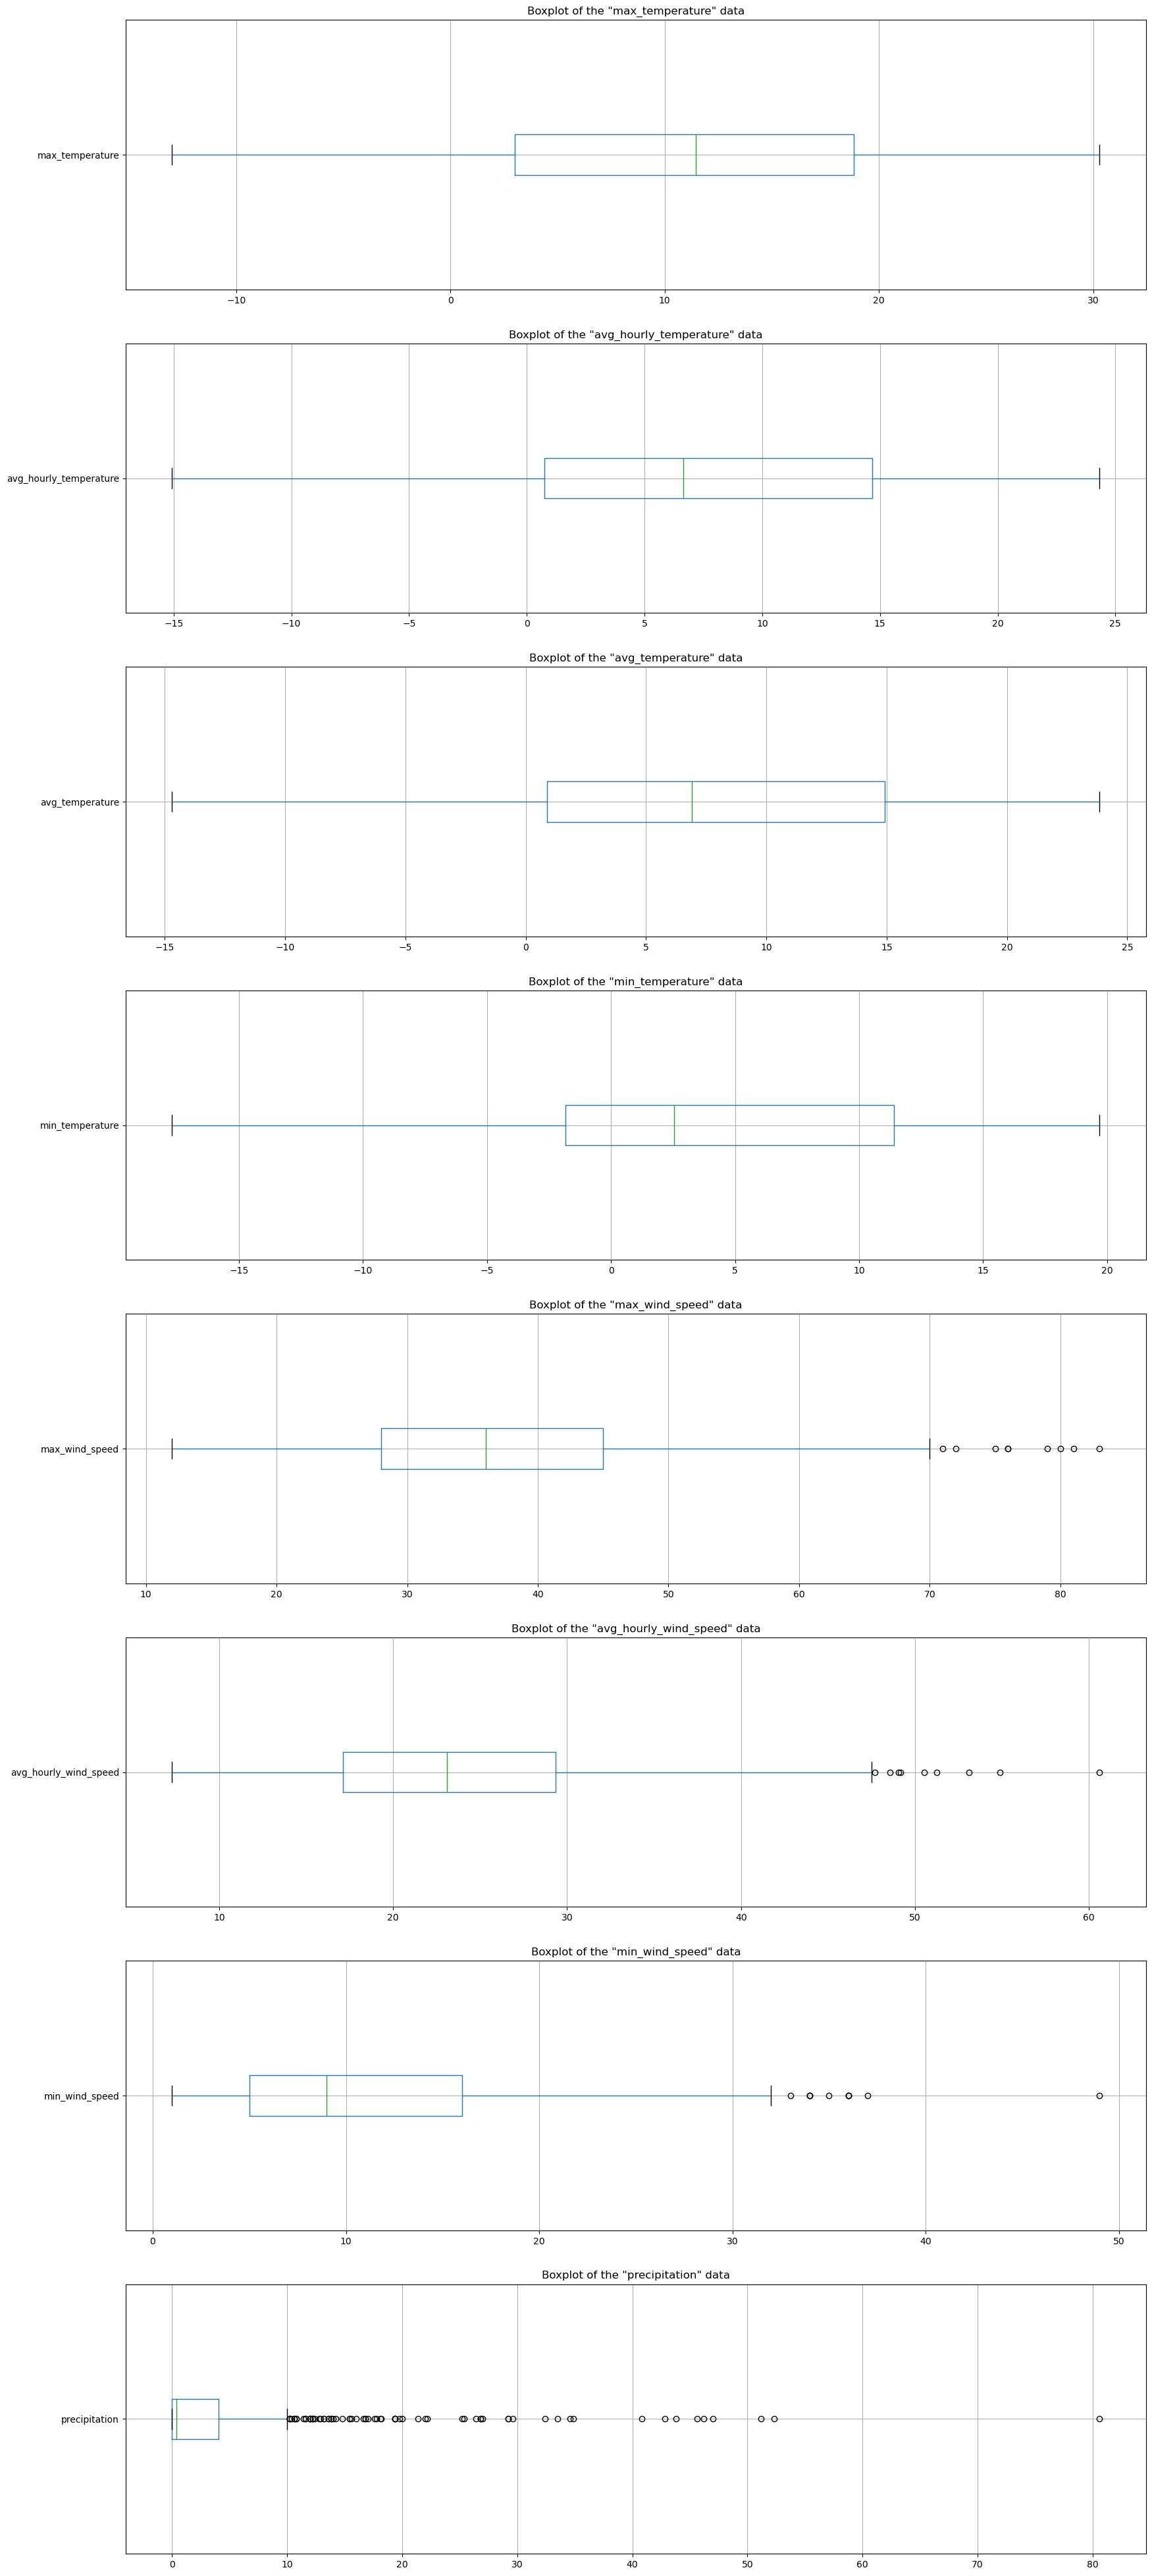

In [4]:
boxplots(df, df.columns)

## Descriptive Statistics

In [3]:
df.describe()

,max_temperature,avg_hourly_temperature,avg_temperature,min_temperature,max_wind_speed,avg_hourly_wind_speed,min_wind_speed,precipitation
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.00000,600.000000
mean,11.339500,7.316550,7.535367,3.733167,36.838333,23.847683,11.23500,3.875333
std,9.439852,8.470733,8.668497,8.240108,12.513320,8.945891,7.75586,8.323442
min,-13.000000,-15.070000,-14.700000,-17.700000,12.000000,7.290000,1.00000,0.000000
25%,3.000000,0.735000,0.897500,-1.825000,28.000000,17.120000,5.00000,0.000000
50%,11.450000,6.640000,6.900000,2.550000,36.000000,23.100000,9.00000,0.400000
75%,18.825000,14.672500,14.917500,11.400000,45.000000,29.342500,16.00000,4.025000
max,30.300000,24.330000,23.850000,19.700000,83.000000,60.610000,49.00000,80.600000
